<a href="https://colab.research.google.com/github/ziedjouini/web-scraping/blob/main/Copie_de_Copie_de_dojo_scraping_zied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Le script suivant permet de récupérer le titre des graines vendues sur ce site : https://www.graines-semences.com/27-cucurbitacees

Nous souhaiterions obtenir un DataFrame affichant le prix dans une colonne en face des titres. 

Attention, vous devez prendre en compte que **certaines graines n'ont pas de prix**, et afficher alors `no price`. 

Vous **n'avez pas à nettoyer les prix**, et vous pouvez les laisser en texte, comme sur l'exemple des premières lignes attendues ci-dessous :

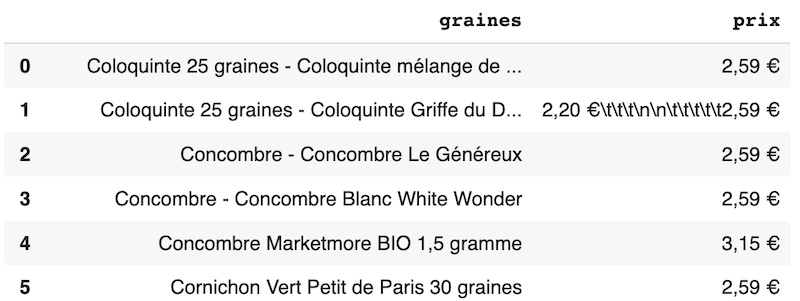

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.graines-semences.com/27-cucurbitacees"
html = requests.get(url)

soup = BeautifulSoup(html.text, 'html.parser')
graines = soup.find_all('div', {"class" : "product-infos"})

for i in graines:
    print(i.find('h3', {"class" : "product-name"}).get_text().strip())
    print(i.find('span').get_text().strip())

Coloquinte 25 graines - Coloquinte mélange de petits fruits
2,33 €
Coloquinte 25 graines - Coloquinte Griffe du Diable
2,33 €
Concombre - Concombre Le Généreux
2,33 €
Concombre - Concombre Blanc White Wonder
2,33 €
Concombre Marketmore BIO 1,5 gramme
2,84 €
Cornichon Vert Petit de Paris 30 graines
2,33 €
Courge - Courge Birdhouse
2,33 €
Courge - Courge Bittergourd
2,33 €
Courge - Courge Buttercup Burgess
2,33 €
Courge - Courge Speckled Swan
2,33 €
Courge - Courge Jumbo Pink Banana
2,33 €
Courge - Courge Musquée de Provence
2,33 €
Courge - Courge Table King
2,33 €
Courge - Courge Jack be Little ou Pomarine
2,33 €
Courge Waltham Butternut 10 graines
2,33 €
Courge Waltham Butternut BIO 2 grammes
2,84 €
Courgette 10 graines - Courgette précoce maraichère
2,33 €
Courgette 10 graines - Courgette de Nice à fruit rond
2,33 €
Courgette 10 graines - Courgette jaune
2,69 €
Courgette 10 graines - Courgette Nimba
2,42 €
Courgette 10 graines - Courgette Spaghetti
2,33 €
Courgette Black Beauty BIO 2 

In [ ]:
import pandas as pd

price=[]
graine=[]
ma_liste=[]

for i in graines:
    val1 = i.find('h3', {"class" : "product-name"}).get_text().strip()
    val2 = i.find('span').get_text().strip()

    graine.append(val1)
    price.append(val2)

    ma_liste.append({'graine':val1,'price':val2})

df_m = pd.DataFrame(ma_liste) # avec un dico

df = pd.DataFrame([graine, price]).T # avec deux listes
df.columns= ["graines", "prix"]

In [ ]:
df

,graines,prix
0,Coloquinte 25 graines - Coloquinte mélange de ...,"2,33 €"
1,Coloquinte 25 graines - Coloquinte Griffe du D...,"2,33 €"
2,Concombre - Concombre Le Généreux,"2,33 €"
3,Concombre - Concombre Blanc White Wonder,"2,33 €"
4,"Concombre Marketmore BIO 1,5 gramme","2,84 €"
5,Cornichon Vert Petit de Paris 30 graines,"2,33 €"
6,Courge - Courge Birdhouse,"2,33 €"
7,Courge - Courge Bittergourd,"2,33 €"
8,Courge - Courge Buttercup Burgess,"2,33 €"
9,Courge - Courge Speckled Swan,"2,33 €"
